# **Ar Lietuvoje gyvena laimigi žmonės?**

**Šio darbo pagrindinis tikslas - išsiaiškint Lietuvos žmonių laimės lygį bei palyginti jį su pasaulio laimės lygiu. Siekiama atskleisti, kurie veiksniai gali daryti įtaką laimės lygiui.**

**Paruošė: Justina Čechovič**

***Pirmiausia susimportuojame visus mums reikalingus paketus, bei duomenis, kuriuos toliau analizuosime.***

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('WHR_2015-2023.csv', index_col=0)

### **Lentelėje žemiau matome duomenis, kuriuos analizuosime toliau. Lentelėje pateikta 2015-2023 metų pasaulio laimės ataskaita. Duomenys susidaro iš šių stulpelių: metai, šalis, regionas, laimės balas ir kiti reiškiniai bei veiksniai, su kuriais bus lyginama laimė: BVP(Ekonomika), socialis palaikymas, sveikata, pasirinkimo laisvė, dosnumas, korupcija.**


In [4]:
data

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
Year,,,,,,,,,
2015,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
2015,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2015,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
2015,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
2015,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...
2023,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800
2023,Zimbabwe,Sub-Saharan Africa,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700
2023,Sierra Leone,Sub-Saharan Africa,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100


### **Žemiau matome, kiek šalių dalyvavo tyrime kiekvienais metais.**

In [5]:
data.groupby('Year')['country'].count()

Year
2015    158
2016    157
2017    155
2018    156
2019    156
2020    153
2021    149
2022    146
2023    137
Name: country, dtype: int64

### **1. Pirmiausia apžvelkime duomenis pasaulio mąstu.**

***1.1. Šiame grafike matome vidutinį laimės indeksą pasaulio mąstu pagal metus. Galime matyti teigiamą pokytį - laimės balas didėja kasmet. 2015 metais vidutinis laimės balas pasaulyje buvo 5,38, o 2023 laimės balas siekė 5,54 balo. Galime pastebėti, kad didžiausias balas buvo 2022 metais (5,55) ir 2023 metais jis šiektiek sumažėjo. Yra žinoma, kad 2023 metais smarkiai augo infliacija, todėl bus įdomu išsiaiškinti, ar laimės balo kritimą galėjo įtakoti ekonomika(BVP)***

Text(0.5, 1.0, 'Mean World Happiness Score by Year')

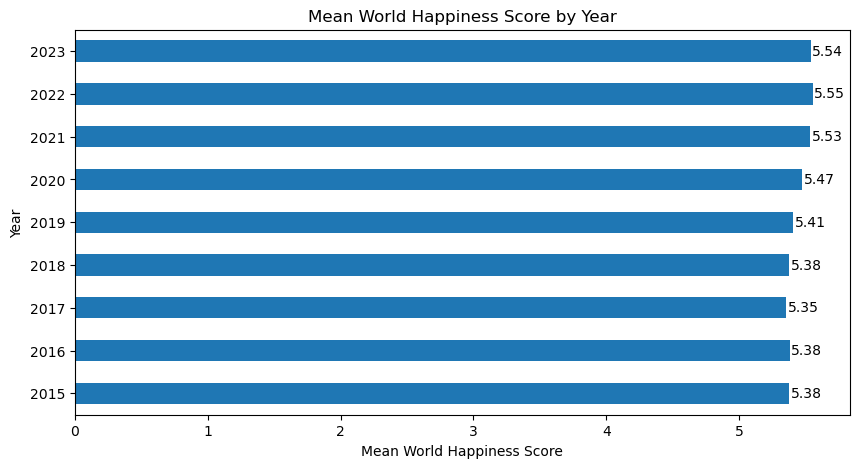

In [6]:
grouped_data = data.groupby('Year')['happiness_score'].mean()
fig, ax = plt.subplots(figsize=(10, 5))
bar_plot = grouped_data.plot(kind='barh', ax=ax)
for i, v in enumerate(grouped_data):
    ax.text(v + 0.01, i, str(round(v, 2)), color='Black', va='center')

plt.xlabel('Mean World Happiness Score')
plt.ylabel('Year')
plt.title('Mean World Happiness Score by Year')

In [7]:
#Pasitikriname ar aukščiau esančiame grafike matome gerus skaičius.
Mean_happiness = data.groupby('Year')['happiness_score'].mean()
Mean_happiness

Year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.375917
2019    5.407096
2020    5.473240
2021    5.532839
2022    5.553575
2023    5.539796
Name: happiness_score, dtype: float64

***1.2. žemiau paskaičiavome, kad nuo 2015 iki 2023 metų, pasaulio laimės balas pakilo 1.64 proc.***

In [4]:
percent_difference_World = ((5.539796 - 5.375734) / 10) * 100
print(f"percent_difference_World: {percent_difference_World:.2f}%")

percent_difference_World: 1.64%


***1.3. Žemiau pateikta lentelė, kurioje matome vidutinį laimės indeksą pagal regionus. Matome, kad Šiaurės Amerikos laimės indeksas yra aukščiausias, o žemiausiai įvertintas yra Afrikos Pietinis regionas. Kas įdomu, tai kad Afrikos pietinio regiono bei Afrikos šiaurės bei vidurio regiono laimės indeksas skiriasi visu balu.
Taip pat galime matyti, kad didžiosios dalies regionų laimės indektas yra 5 balų rėžyje.***

In [5]:
Region = data.groupby('region')['happiness_score'].mean()
Region.sort_values(ascending=False)

region
North America and ANZ                 7.176058
Western Europe                        6.811461
Latin America and Caribbean           5.993861
East Asia                             5.732150
Commonwealth of Independent States    5.639041
Central and Eastern Europe            5.585753
Southeast Asia                        5.370429
Middle East and North Africa          5.275104
Africa                                5.057000
South Asia                            4.473264
Sub-Saharan Africa                    4.288796
Name: happiness_score, dtype: float64

***1.4. Toliau matome top 5 laimingiausių ir mažiausią laimės indeksą turinčias šalis.
Matome, kad laimingiausi žmonės gyvena Suomijoje, Danijoje, Islandijoje, Šveicarijoje bei Norvegijoje. Mažiausiai laimingos šalys yra Afganistanas, Centrinės Afrikos respubloka, Šiaurės Sudanas, Burundis ir Sirija.***


In [6]:
mean_scores_by_country = data.groupby('country')['happiness_score'].mean()
top_5_countries = mean_scores_by_country.sort_values(ascending=False).head(5)
top_5_countries

country
Finland        7.662744
Denmark        7.579733
Iceland        7.522278
Switzerland    7.493322
Norway         7.473889
Name: happiness_score, dtype: float64

In [11]:
mean_scores_by_country = data.groupby('country')['happiness_score'].mean()
untop_5_countries = mean_scores_by_country.sort_values(ascending=True).head(5)
untop_5_countries

country
Afghanistan                 2.990767
Central African Republic    3.202580
South Sudan                 3.269320
Burundi                     3.277900
Syria                       3.292200
Name: happiness_score, dtype: float64

***1.5. Toliau apžvelgsime, kokie veiksniai labiausiai susiję su laimės balu pasaulyje. Žemiau pateiktos diagramos, kurios parodo laimės balo sąsajas su mūsų duomenyse pateiktais veiksniais:***

Text(0, 0.5, 'happiness_score')

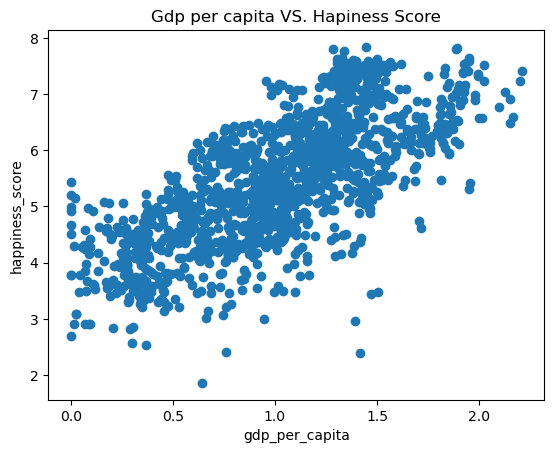

In [12]:
plt.scatter(data['gdp_per_capita'], data['happiness_score'])
plt.title('Gdp per capita VS. Hapiness Score')
plt.xlabel('gdp_per_capita')
plt.ylabel('happiness_score')

Text(0, 0.5, 'happiness_score')

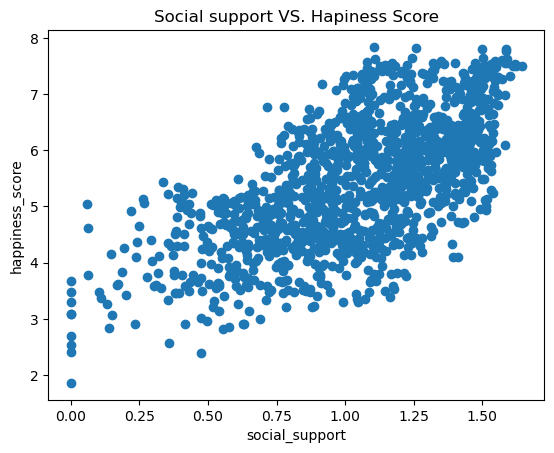

In [13]:
plt.scatter(data['social_support'], data['happiness_score'])
plt.title('Social support VS. Hapiness Score')
plt.xlabel('social_support')
plt.ylabel('happiness_score')

Text(0, 0.5, 'happiness_score')

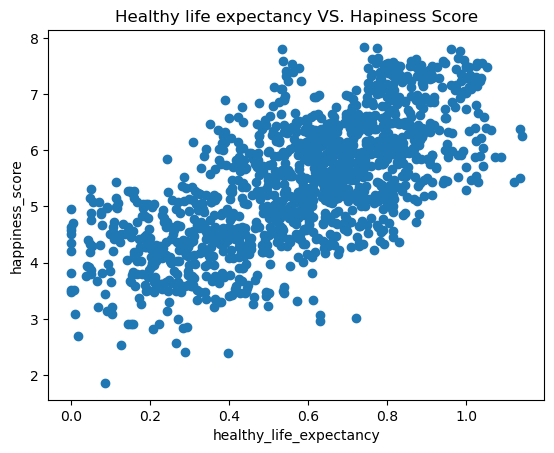

In [14]:
plt.scatter(data['healthy_life_expectancy'], data['happiness_score'])
plt.title('Healthy life expectancy VS. Hapiness Score')
plt.xlabel('healthy_life_expectancy')
plt.ylabel('happiness_score')

Text(0, 0.5, 'happiness_score')

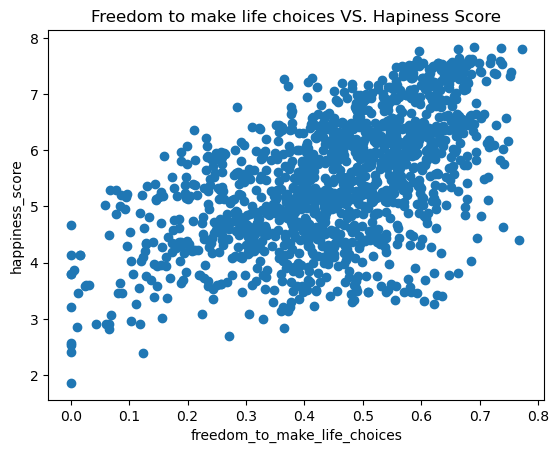

In [15]:
plt.scatter(data['freedom_to_make_life_choices'], data['happiness_score'])
plt.title('Freedom to make life choices VS. Hapiness Score')
plt.xlabel('freedom_to_make_life_choices')
plt.ylabel('happiness_score')

Text(0, 0.5, 'happiness_score')

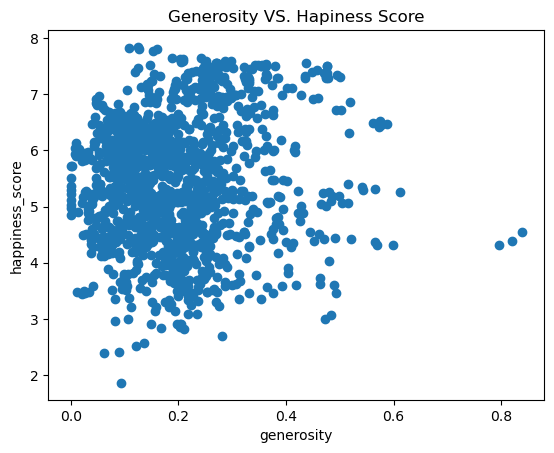

In [16]:
plt.scatter(data['generosity'], data['happiness_score'])
plt.title('Generosity VS. Hapiness Score')
plt.xlabel('generosity')
plt.ylabel('happiness_score')

Text(0, 0.5, 'happiness_score')

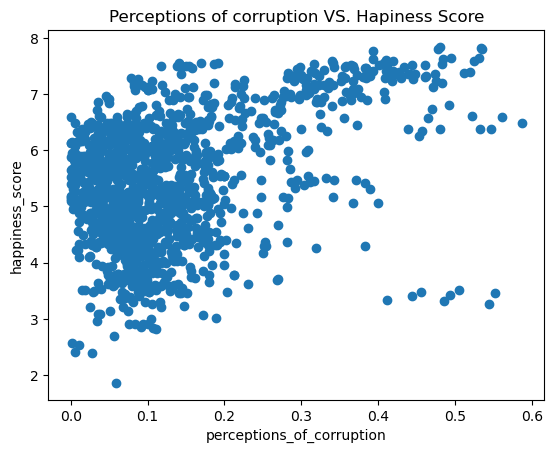

In [17]:
plt.scatter(data['perceptions_of_corruption'], data['happiness_score'])
plt.title('Perceptions of corruption VS. Hapiness Score')
plt.xlabel('perceptions_of_corruption')
plt.ylabel('happiness_score')

   ***Remiantis grafikais, galime teigti, kad didžiausią sąsają su laimės balu turi šie veiksniai: sacialinis palaikymas, sveikata bei pasirinkimo laisvė. Šių veiksnių indeksai ir laimės balo pokytis tolygiai auga atsižvelgiant vienas į kitą.*** 
   ***Taip pat matome, kad su laimės balo aukštumu nemažai susijusi yra ekonomika (BVP). Didėjant ekonomikos indeksui, didėja ir laimės balas, tik šiektiek mažiau tolygiai, lyginant su socialinės paramos, sveikatos ir pasirinkimo laisvės indeksais.***
   ***Dosnumas ir Korupcija yra menkai susijusi su laimės balo aukštumu. Nematome kad laimės balo didėjimas nepriklauso ar dosnumas bei korupcija yra įvertinta aukštai ar žemai.***
   
   ***Apibendrinant galime teigti, kad kasmet pasaulyje laimės lygis didėja. Nuo 2015 iki 2023 metų laimės balas paaugo 1.64 proc.***
   

### **2. Dabar apžvelkime Lietuvos laimės indeksą ir kokie veiksniai daro įtaką jam.**

***2.1. Lentelėje matome, kad Lietuva priklauso Rytų-vidurio Europos regionui, Taip pat galime matyti kiekvienų metų laimės balą Lietuvoje bei kiti veiksniai, su kuriais bus lyginamas laimės balas Lietuvoje.***

In [18]:
LT = data[data['country'] == 'Lithuania']
LT

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
Year,,,,,,,,,
2015,Lithuania,Central and Eastern Europe,5.8330,1.147230,1.257450,0.731280,0.213420,0.026410,0.010310
2016,Lithuania,Central and Eastern Europe,5.8130,1.269200,1.064110,0.646740,0.189290,0.020250,0.018200
2017,Lithuania,Central and Eastern Europe,5.9020,1.314582,1.473516,0.628950,0.234232,0.010165,0.011866
2018,Lithuania,Central and Eastern Europe,5.9520,1.197000,1.527000,0.716000,0.350000,0.026000,0.006000
2019,Lithuania,Central and Eastern Europe,6.1490,1.238000,1.515000,0.818000,0.291000,0.043000,0.042000
2020,Lithuania,Central and Eastern Europe,6.2155,1.193560,1.432866,0.795421,0.420461,0.053691,0.081350
2021,Lithuania,Central and Eastern Europe,6.2550,1.350000,1.065000,0.612000,0.476000,0.056000,0.073000
2022,Lithuania,Central and Eastern Europe,6.4460,1.804000,1.204000,0.659000,0.496000,0.053000,0.077000
2023,Lithuania,Central and Eastern Europe,6.7630,1.808000,1.511000,0.432000,0.487000,0.059000,0.089000


***2.2. Grafikas apačioje atvaizuoja, kad Lietuvos laimės indeksas didėja kiekvienai metais. Nepaisant pandemijos ir infliacijos, matome, kad Lietuvoje laimės indeksas ne tik nesumažėjo dėl šių reiškinių, bet ir sėkmingai kilo. Nuo 2015 iki 2023 metų, vidutinis laimės indeksas Lietuvoje pakilo beveik balu ( nuo 5,83 iki 6.76)***
***Grafike matome, kad Lietuvoje dižiausias laimės balo kilimas buvo 2018 metais ir 2021-2023 metais.***


Text(0, 0.5, 'happiness score')

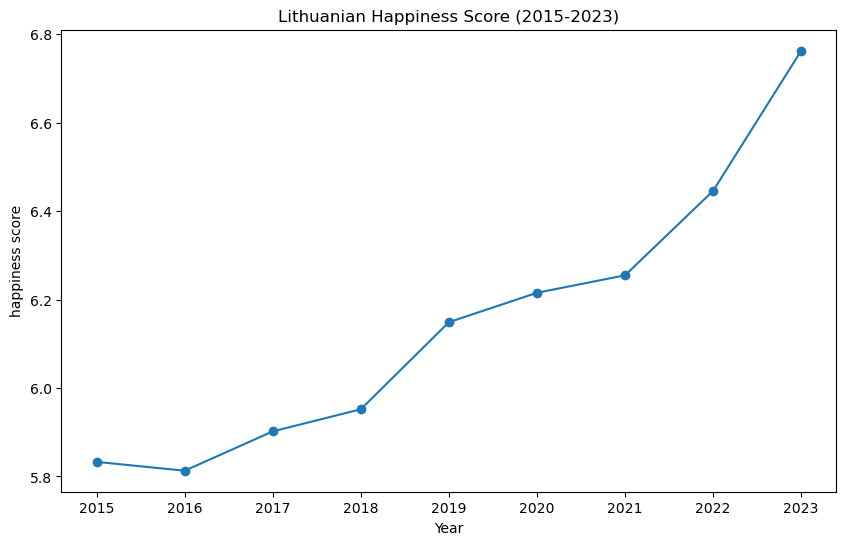

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(LT.index, LT['happiness_score'], marker='o', linestyle='-')
plt.title('Lithuanian Happiness Score (2015-2023)')
plt.xlabel('Year')
plt.ylabel('happiness score')

***2.3. Žemiau matome, kad lietuvoje laimės balas nuo 2015 metų kilo labai sparčiai. Jis padidėjo net 9.3 proc.***

In [20]:
LT_happiness_score_2015 = LT.loc[2015, 'happiness_score']
LT_happiness_score_2023 = LT.loc[2023, 'happiness_score']
percent_difference = ((LT_happiness_score_2023 - LT_happiness_score_2015) / 10) * 100
print(f'Percentage difference between 2015 and 2023: {percent_difference:.2f}%')

Percentage difference between 2015 and 2023: 9.30%


***2.4. Dabar apžvelgsime kokie veiksniai labiausiai susiję su laimės balu Lietuvoje. Žemiau pateiktos diagramos, kurios parodo laimės balo sąsajas su mūsų duomenyse pateiktais veiksniais pagal metus:***

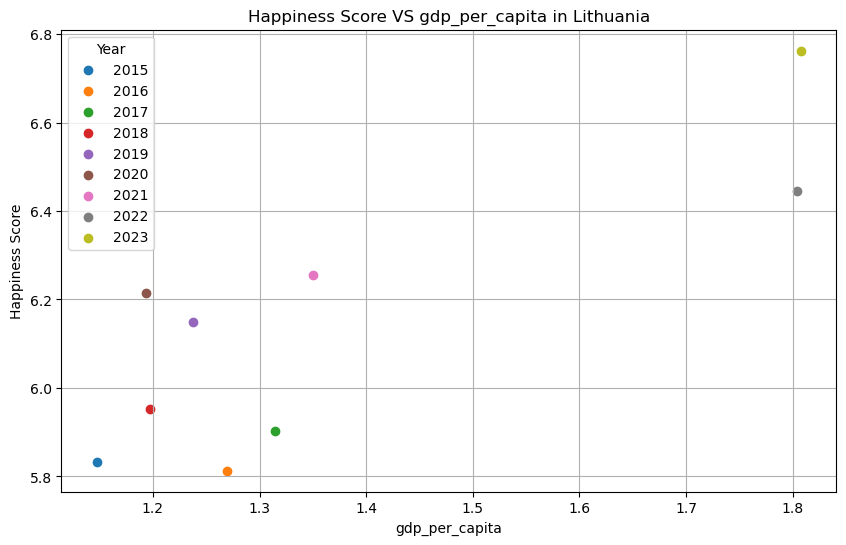

In [21]:
plt.figure(figsize=(10, 6))
for year, group in LT.groupby('Year'):
    plt.scatter(group['gdp_per_capita'], group['happiness_score'], label=year, alpha=1)
plt.xlabel('gdp_per_capita')
plt.ylabel('Happiness Score')
plt.title('Happiness Score VS gdp_per_capita in Lithuania')
plt.legend(title='Year')
plt.grid(True)

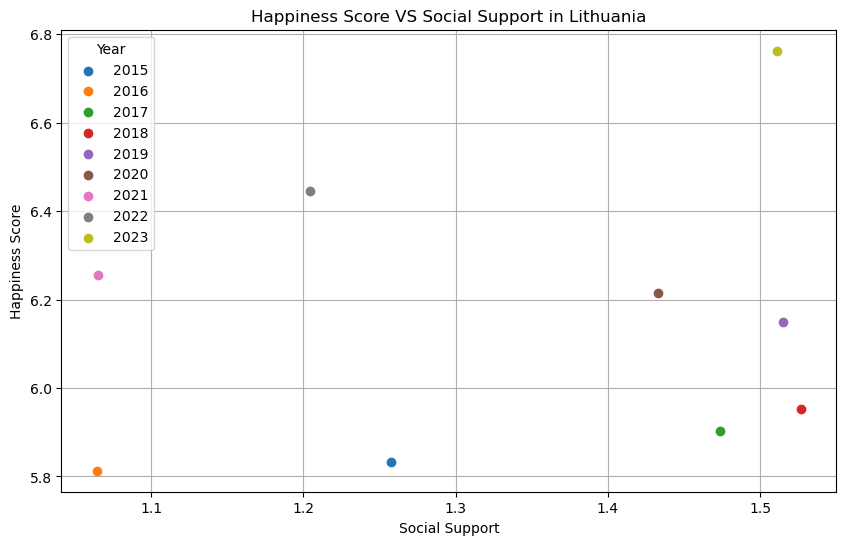

In [22]:
plt.figure(figsize=(10, 6))
for year, group in LT.groupby('Year'):
    plt.scatter(group['social_support'], group['happiness_score'], label=year, alpha=1)
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Happiness Score VS Social Support in Lithuania')
plt.legend(title='Year')
plt.grid(True)

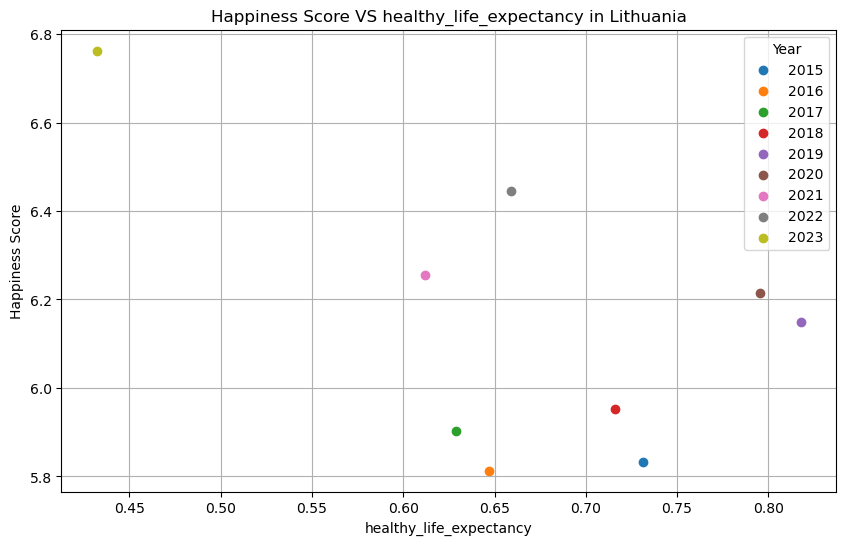

In [23]:
plt.figure(figsize=(10, 6))
for year, group in LT.groupby('Year'):
    plt.scatter(group['healthy_life_expectancy'], group['happiness_score'], label=year, alpha=1)
plt.xlabel('healthy_life_expectancy')
plt.ylabel('Happiness Score')
plt.title('Happiness Score VS healthy_life_expectancy in Lithuania')
plt.legend(title='Year')
plt.grid(True)

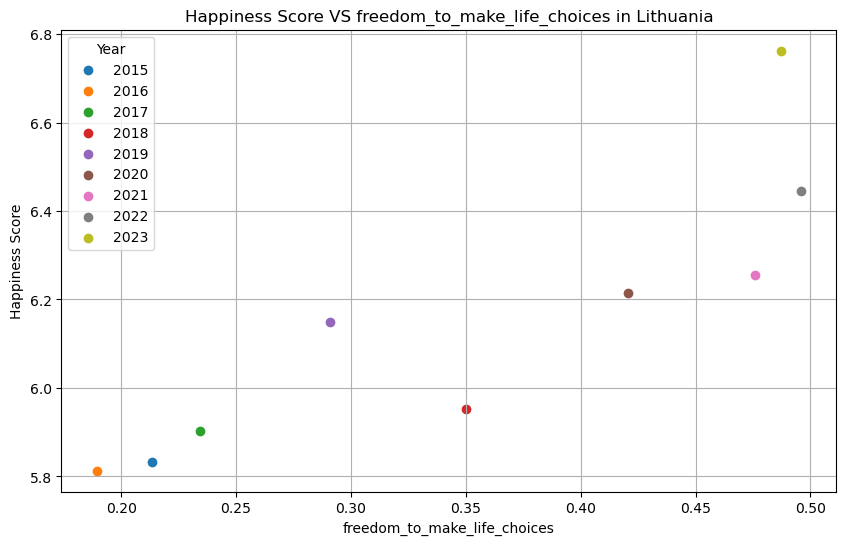

In [24]:
plt.figure(figsize=(10, 6))
for year, group in LT.groupby('Year'):
    plt.scatter(group['freedom_to_make_life_choices'], group['happiness_score'], label=year, alpha=1)
plt.xlabel('freedom_to_make_life_choices')
plt.ylabel('Happiness Score')
plt.title('Happiness Score VS freedom_to_make_life_choices in Lithuania')
plt.legend(title='Year')
plt.grid(True)

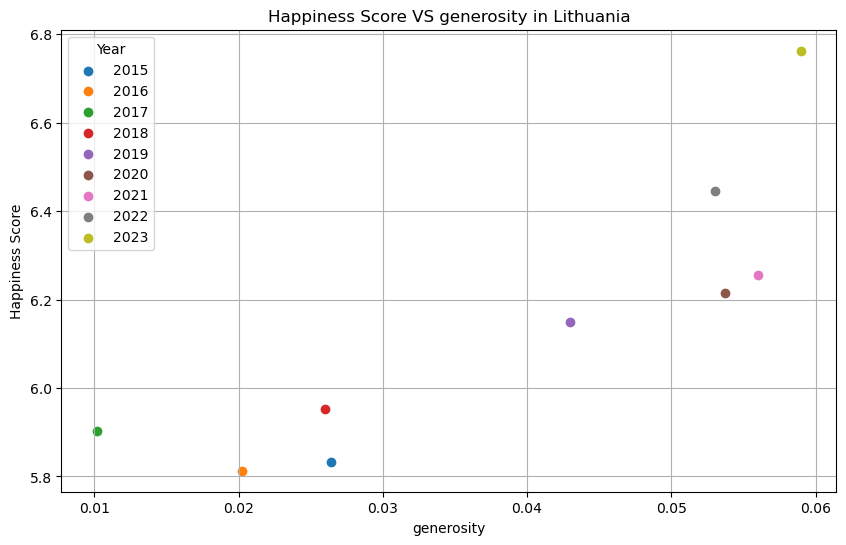

In [25]:
plt.figure(figsize=(10, 6))
for year, group in LT.groupby('Year'):
    plt.scatter(group['generosity'], group['happiness_score'], label=year, alpha=1)
plt.xlabel('generosity')
plt.ylabel('Happiness Score')
plt.title('Happiness Score VS generosity in Lithuania')
plt.legend(title='Year')
plt.grid(True)

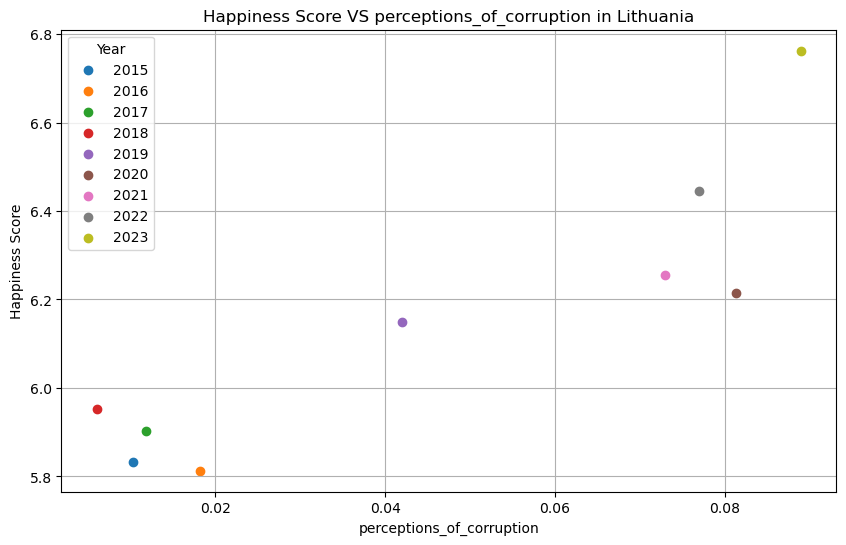

In [26]:
plt.figure(figsize=(10, 6))
for year, group in LT.groupby('Year'):
    plt.scatter(group['perceptions_of_corruption'], group['happiness_score'], label=year, alpha=1)
plt.xlabel('perceptions_of_corruption')
plt.ylabel('Happiness Score')
plt.title('Happiness Score VS perceptions_of_corruption in Lithuania')
plt.legend(title='Year')
plt.grid(True)

***Remiantis grafikais, galime teigti, kad didžiausią sąsają su laimės balu Lietuvoje turi šie veiksniai: Korupcija, Dosnumas bei pasirinkimo laisvė. Šių veiksnių indeksai ir laimės balo pokytis gana tolygiai auga atsižvelgiant vienas į kitą. Taip pat matome, kad su laimės balo aukštumu nemažai susijusi yra ekonomika (BVP). Deja, tarp laimės balo bei sveikatos ir socialinės paramos veiksnių akivaizdaus ryšio pastebėti nepavyko.***



***Apibendrinant, galime teigti, kad Lietuvoje žmonės kiekvienais metais darosi laimingesni. Lietuvos laimės balas nuo 2015 iki 2023 metų padidėjo 9,30 proc.***


### **3. Lietuvos laimės balų palyginimas su pasauliu**

***3.1. Lentelėje žemiau matome Lietuvos bei pasaulio vidutinį laimės balą pagal metus, matome, kad Lietuvos laimės balas kiekvienais metais yra aukštesnis nei vidutinis pasaulio, todėl galime teigti, kad Lietuvoje gyvena laimingesni žmonės, nei vidutiniškai visame pasaulyje.***

In [27]:
World_VS_LT_Mean_Happiness = {
    'Year': ['2015', '2016', '2017', '2018','2019', '2020', '2021','2022','2023'],
    'Mean World HS': ['5,38', '5,38', '5,35', '5,38','5,41', '5,47', '5,53', '5,55', '5,54'],
    'Mean LT HS': ['5,83', '5,81', '5,90', '5,95','6,14', '6,22', '6,25', '6,44', '6,76']
}
df = pd.DataFrame(World_VS_LT_Mean_Happiness)
print(df)

   Year Mean World HS Mean LT HS
0  2015          5,38       5,83
1  2016          5,38       5,81
2  2017          5,35       5,90
3  2018          5,38       5,95
4  2019          5,41       6,14
5  2020          5,47       6,22
6  2021          5,53       6,25
7  2022          5,55       6,44
8  2023          5,54       6,76


***

***Grafikas žemiau atvazduoja prieš tai buvusios lentelės duomenis. Matome, kad Lietuvos Laimės balo augimas kiekvienais metais sparčiai didėja lyginant su pasaulio laimės balu. Pasaulio laimės balas didėja palyginus labai nedaug.***

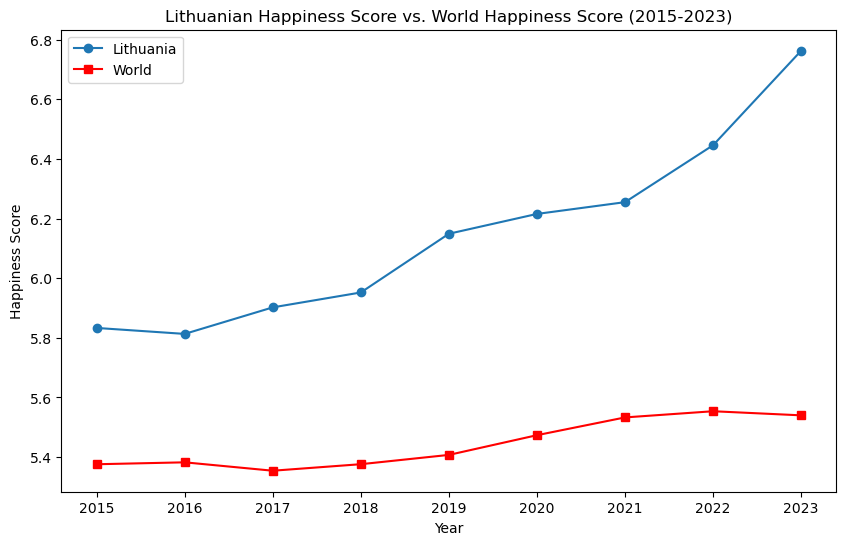

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(LT.index, LT['happiness_score'], marker='o', linestyle='-', label='Lithuania')
plt.plot(Mean_happiness.index, Mean_happiness.values, marker='s', linestyle='-', label='World', color='red')
plt.title('Lithuanian Happiness Score vs. World Happiness Score (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend()

***3.2. Žemiau palyginti Lietuvos ir pasaulio laimės balo procentų augimas nuo 2015 iki 2023 metų. Kaip ir anksčiau matyti duomenys rodė, kad Lietuvos laimės balo augimas lenkia vidutinį pasaulio laimės balo augimą. Lietuvos laimės balas paaugo 9,30 proc., Pasaulio - 1,64 proc.***

In [29]:
World_VS_LT_Proc = {
    'LT HS Proc': ['9,30'],
    '':[''],
    'World HS Proc': ['1,64']
}
df2 = pd.DataFrame(World_VS_LT_Proc)
print(df2)

  LT HS Proc   World HS Proc
0       9,30            1,64


***3.3. Anksčiau aiškinomės, kokie veiksniai labiausiai susiję su laimės balu pasaulyje ir Lietuvoje. Lentelėje žemiau matome, kad Lietuvos rezultatai šiektiek skiriasi su pasaulio. Analizuojant Pasaulio duomenis, išaiškėjo, kad laimės balo aukštumas susijęs su Socialiniu palaikimu ir sveikata, Šių veiksnių akivaizdžios sąsajos su laimės balu nepavyko pamatyti analizuojant Lietuvos duomenis. Lietuvoje, labiau nei pasaulyje ryškėjo Korupcijos ir dosnumo veiksnių sąsajos su laimės balo aukštumu. Matome, kad vienodai svarbi tiek pasaulyje, tiek Lietuvoje yra pasirinkimo laisvė ir ekonomika.***

In [30]:
World_VS_LT = {
    'World': ['Socialinia palaikymas', 'Sveikata', 'Pasirinkimo laisvė','Ekonomika'],
    '': ['', '', '',''],
    'Lithuania': ['Korupcija', 'Dosnumas', 'Pasirinkimo laisvė', 'Ekonomika']
}
df3 = pd.DataFrame(World_VS_LT)
print(df3)

                   World             Lithuania
0  Socialinia palaikymas             Korupcija
1               Sveikata              Dosnumas
2     Pasirinkimo laisvė    Pasirinkimo laisvė
3              Ekonomika             Ekonomika


### **4. Išvados:**

***4.1. Analizė parodė, kad Lietuvoje žmonės jaučiasi laimingesni nei vidutiniškai žmonės pasaulyje***

***4.2. Lietuvos laimės balas auga žymiai greičiau nei vidutiniškai pasaulio laimės balas. Kasmet Lietuvos žmonės jaučiasi vis laimingesni.***

***Lietuvos laimės balas paaugo 9,30 proc., Pasaulio - 1,64 proc.***

***4.3. Analizuojant Pasaulio duomenis, išaiškėjo, kad laimės balo aukštumas susijęs su Socialiniu palaikimu ir sveikata, Šių veiksnių akivaizdžios sąsajos su laimės balu nepavyko pamatyti analizuojant Lietuvos duomenis. Lietuvoje, labiau nei pasaulyje ryškėjo Korupcijos ir dosnumo veiksnių sąsajos su laimės balo aukštumu. Matome, kad vienodai svarbi tiek pasaulyje, tiek Lietuvoje yra pasirinkimo laisvė ir ekonomika.***

***4.4. Ar Lietuvoje gyvena laimingi žmonės? - Taip, Lietuvoje gyvena laimingi žmonės***